In [28]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
from keras.optimizers import Adam #opt imizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

In [29]:
(x_train, y_train), (x_test, y_test)=mnist.load_data () #splitting the mnist data into train and test

In [30]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [31]:
x_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

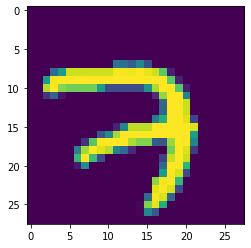

In [32]:
plt.imshow(x_train[5000])

In [6]:
np.argmax(y_train[5100])

0

In [7]:
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

In [8]:
number_of_classes = 10

In [9]:
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

In [10]:
model=Sequential ()

In [11]:
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [12]:
model.add(Flatten())


In [13]:
model.add(Dense(number_of_classes,activation = 'softmax'))


In [14]:
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])


In [15]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)


In [16]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 209s 111ms/step - loss: 0.2131 - accuracy: 0.9521 - val_loss: 0.0945 - val_accuracy: 0.9701
Epoch 2/5
1875/1875 [==============================] - 204s 109ms/step - loss: 0.0716 - accuracy: 0.9776 - val_loss: 0.0913 - val_accuracy: 0.9721
Epoch 3/5
1875/1875 [==============================] - 207s 110ms/step - loss: 0.0513 - accuracy: 0.9838 - val_loss: 0.0870 - val_accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 206s 110ms/step - loss: 0.0382 - accuracy: 0.9880 - val_loss: 0.0970 - val_accuracy: 0.9738
Epoch 5/5
1875/1875 [==============================] - 206s 110ms/step - loss: 0.0334 - accuracy: 0.9898 - val_loss: 0.1017 - val_accuracy: 0.9757


In [17]:
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.10174448043107986, 0.9757000207901001]


In [18]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 95ms/step
[[1.14334523e-11 1.00483493e-11 1.57518668e-11 5.62079151e-07
  1.10862299e-03 1.96801057e-06 2.65109506e-12 1.01926025e-05
  1.59619461e-07 9.98878539e-01]]


In [33]:
import numpy as np
print(np.argmax(prediction, axis=1))

[9]


In [34]:
np.argmax(y_test[6000:6001])

0

In [35]:
model.save('models/mnistCNN.h5')
